# Python - Week 10 - HW
## Shahin Mammadov

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from neuralprophet import NeuralProphet

In [2]:
data = pd.read_csv("wiki_machine_learning.csv", delimiter=' ')

In [3]:
data.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


In [5]:
data['count'].describe()

count     384.000000
mean     2331.445312
std       669.885936
min         0.000000
25%      1723.500000
50%      2431.500000
75%      2783.500000
max      4932.000000
Name: count, dtype: float64

In [6]:
data = data[data['count']>0]
data = data.rename(columns={'date': 'ds', 'count': 'y'})
data.drop(columns=['lang', 'page', 'rank', 'month', 'title'], inplace=True)

## FB Prophet

In [7]:
m = Prophet()
m.fit(data)

11:54:46 - cmdstanpy - INFO - Chain [1] start processing
11:54:46 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = m.make_future_dataframe(periods=30)

In [9]:
future.tail(30)

,ds
383,2016-01-21
384,2016-01-22
385,2016-01-23
386,2016-01-24
387,2016-01-25
388,2016-01-26
389,2016-01-27
390,2016-01-28
391,2016-01-29
392,2016-01-30


In [10]:
forecast = m.predict(future)

In [11]:
forecast[['ds', 'yhat']].tail(30)

,ds,yhat
383,2016-01-21,2925.705864
384,2016-01-22,2604.686696
385,2016-01-23,1771.993100
386,2016-01-24,1912.558428
387,2016-01-25,2927.584835
388,2016-01-26,3166.068268
389,2016-01-27,3058.654318
390,2016-01-28,2937.027576
391,2016-01-29,2616.008408
392,2016-01-30,1783.314812


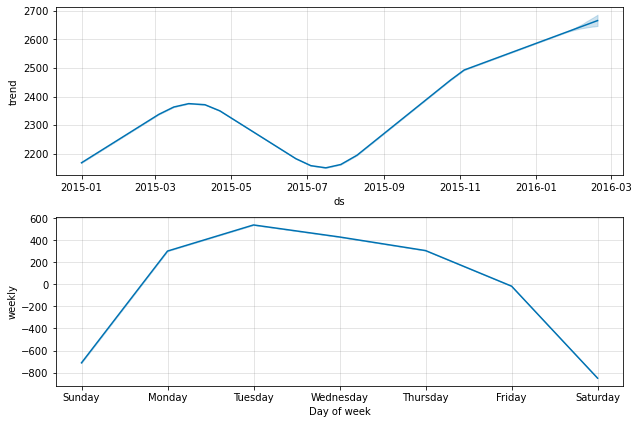

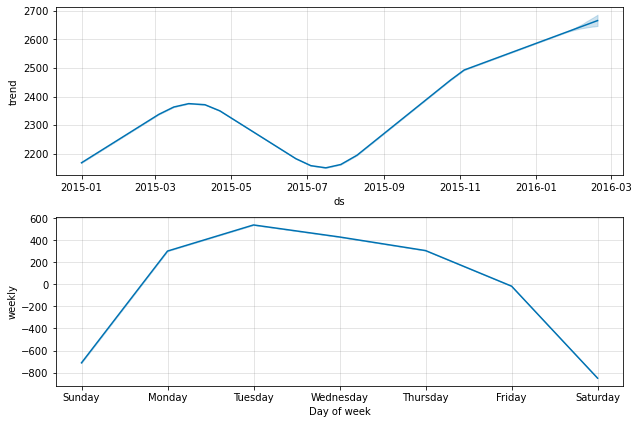

In [12]:
m.plot_components(forecast)

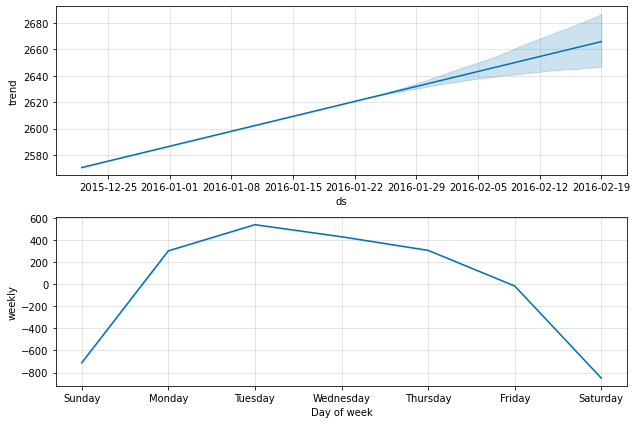

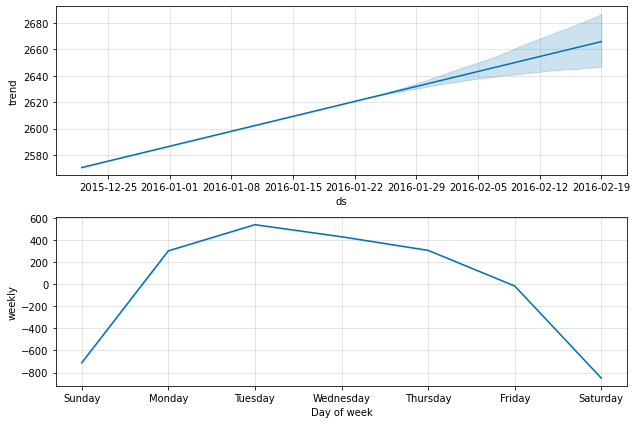

In [13]:
m.plot_components(forecast.tail(60))

## Neural Prophet

In [14]:
m = NeuralProphet()

In [15]:
metrics = m.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.217% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 273


  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.88E-02, min: 9.61E-01


  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.88E-02, min: 2.75E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.53E-02
Epoch[273/273]: 100%|██████████| 273/273 [00:13<00:00, 20.61it/s, SmoothL1Loss=0.00875, MAE=212, RMSE=303, Loss=0.00673, RegLoss=0]


In [18]:
future = m.make_future_dataframe(data, periods = 30)
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.217% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [20]:
forecast

,ds,y,residual1,yhat1,trend,season_weekly
0,2016-01-21,None,NaN,2779.872559,2476.122559,303.749786
1,2016-01-22,None,NaN,2450.959961,2474.408203,-23.448309
2,2016-01-23,None,NaN,1615.000000,2472.693359,-857.693604
3,2016-01-24,None,NaN,1749.809204,2470.979004,-721.169922
4,2016-01-25,None,NaN,2784.572021,2469.264648,315.307373
5,2016-01-26,None,NaN,2998.424316,2467.550049,530.874329
6,2016-01-27,None,NaN,2918.215820,2465.835449,452.380249
7,2016-01-28,None,NaN,2767.870605,2464.120850,303.749786
8,2016-01-29,None,NaN,2438.958496,2462.406738,-23.448309
9,2016-01-30,None,NaN,1602.998535,2460.691895,-857.693604
